# shivam garg

In [5]:
from sklearn import datasets
import nltk
import re
import matplotlib.pyplot as plt
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from sklearn.metrics import classification_report, confusion_matrix

# taking 20_newsgroup as my training data 

In [6]:
from sklearn import datasets
data1=datasets.load_files(r"C:\Users\shivamGarg\Documents\20_newsgroups")

In [24]:
# x consist of all the document which i used for classification
# y_train is the list of classes corresponding to each document
x=data1.data
Y_train=data1.target


In [8]:
# downloading stopwords
nltk.download("stopwords")
stop_words=(stopwords.words("english"))
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shivamGarg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# data cleaning

In [10]:

X=[]

for i in range(len(x)):
    # to remove all the special character
    document = re.sub(r'\W', ' ', str(x[i]))
    
    # to convert multiple spaces into single spaces
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # removed prefixed b
    document = re.sub(r'^b\s+', '', document)
    
    # remove integers
    document = re.sub(r'\d+', '', document)
    
    # convert all words into lowerletter
    document = document.lower()
    
    X.append(document)



# creating my dictionary of words

In [12]:
dictionary={}
#document equals to each document in X
#word_list is the list of all the words in document
#this dictionary consist of words of lenght more than 2 and also not a stopword
for document in X:
    words_list=document.split()
    for word in words_list:
        if word in stop_words:
            continue
        elif (len(word)>2) and (word in dictionary.keys()):
            dictionary[word]=dictionary[word]+1
        elif (len(word)>2):
            dictionary[word]=1

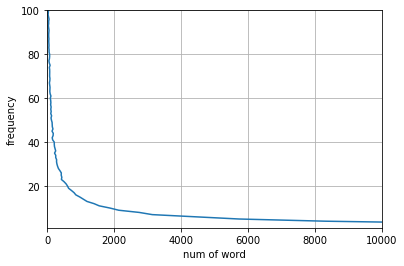

In [15]:
#plotting the dictinary

a=max(dictionary.values())
num_word=[0 for i in range(a+1)]
frequency=[i for i in range(a+1)]
for key in dictionary:
    num_word[dictionary[key]]=num_word[dictionary[key]]+1
plt.plot(num_word,frequency)
plt.xlabel("num of word")
plt.ylabel("frequency")
plt.axis([0,10000,1,100])
plt.grid()
plt.show()

In [68]:
# creating a new dictionary named vocabulary by cleaning those words whose frequency less than cutoff frequency
cutoff=100
vocabulary={}
for key in dictionary:
    if dictionary[key]>cutoff:
         vocabulary[key]=dictionary[key]
feature_list=list(vocabulary.keys())

# number of columns in my classification is
len(vocabulary.keys())

5408

In [69]:
# creating a numpy array of dimension( num_datapoints x num_features)
# num_datapoints equals to number of documents
# num_feature equal to number of keys in my vocabulary
num_datapoints=len(X)
num_features=len(vocabulary.keys())
train_data=np.zeros((num_datapoints,num_features))

# creating my train_data from the documnets in the list X
i=0
for doc in X:
        word_list=doc.split()
        for word in word_list:
            if word in vocabulary.keys():
                        pos_x=i
                        pos_y=feature_list.index(word)
                        train_data[pos_x][pos_y]=train_data[pos_x][pos_y]+1
        i=i+1   
        

In [70]:
train_data

array([[1., 1., 2., ..., 0., 0., 0.],
       [0., 2., 3., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

# implemening Naive bayes from scratch 

In [71]:
# fit function creates a dictionary result  whose keys is classes(20 classes)
# fit function also conatin a key named "total_data" which is equal to the  len of Y_train
# result[current_class] is also a dictionary whose keys are features of train_data
# result[current_class] conatins two more key one is "total_count_rows" whose value equal to number of rows corr. to that class
# another is "total_count_words" which gives me the all words( sum along rows then along column) for that class
def fit(X_train,Y_train):
        result={}
        class_values=set(Y_train)
        result["total_data"]=len(Y_train)
        for current_class in class_values:
            result[current_class]={}
            current_class_rows=(Y_train==current_class)
            X_train_current=X_train[current_class_rows]
            Y_train_current=Y_train[current_class_rows]
            result[current_class]["total_count_rows"]=len(Y_train_current)
            columns_sum=np.sum(X_train_current,axis=0)
            features_list=X_train_current.shape[1]
            result[current_class]["total_count_words"]=0
            for j in range(features_list):
                result[current_class][j]=columns_sum[j]
                result[current_class]["total_count_words"]+=columns_sum[j]
        return result        
                

            
            
            

In [72]:
final_dict=fit(train_data,Y_train)

In [73]:
# calculates the prbability
def probability(dictionary,X,current_class):
    output = np.log(dictionary[current_class]["total_count_rows"]) - np.log(dictionary["total_data"])
    total_words = len(X)
  
    for j in range(total_words ):
        count_current_class_with_word = dictionary[current_class][j]+1
        count_current_class = dictionary[current_class]["total_count_words"] +total_words
        current_probablity =  X[j]*(np.log(count_current_class_with_word) - np.log(count_current_class))
        output = output + current_probablity
    return output

In [74]:
#predict the class for a particular row
def predictSinglePoint(dictionary,X):
    classes=dictionary.keys()
    best_p=None
    best_class=None
    check=True
    for current_class in classes:
        if current_class=="total_data":
             continue
        current_class_prob=probability(dictionary,X,current_class)
        if(check or current_class_prob>best_p):
            best_p=current_class_prob
            best_class=current_class
        check=False
    return best_class    
        

In [75]:

def predict(dictionary,X_test):
    Y_test=[]
    for test in X_test:
        ans=predictSinglePoint(dictionary,test)
        Y_test.append(ans)
    return Y_test    

In [76]:
def score(Y_pred,Y_true):
        
        count = 0
        for i in range(len(Y_pred)):
            if Y_pred[i] == Y_true[i]:
                count+=1
        return count/len(Y_pred)

# taking mini_newsgroup as my test data 

In [77]:

test_data=datasets.load_files(r"C:\Users\shivamGarg\Documents\mini_newsgroups")

In [78]:
# x_test consist of all the documnets for testing
# Y_test is the list of classes corrosponds to X_test documents
x_test=test_data.data
Y_test=test_data.target

In [79]:
# X_test consist of clean documnets 
X_test=[]
for i in range(len(x_test)):
    # to remove all the special character
    document = re.sub(r'\W', ' ', str(x_test[i]))
    
    # to convert multiple spaces into single spaces
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # removed prefixed b
    document = re.sub(r'^b\s+', '', document)
    
    # remove integers
    document = re.sub(r'\d+', '', document)
    
    # convert all words into lowerletter
    document = document.lower()
    
    X_test.append(document)


len(X_test)

2000

In [80]:
#  creating a numpy array of dimension a x b
# a equals to number of documnets in X_test
# b equlas to number of features 
a=len(X_test)
b=len(list(vocabulary.keys()))
test_data=np.zeros((a,b))


In [81]:
# creating test_data 
i=0
for doc in X_test:
        word_list=doc.split()
        for word in word_list:
            if word in vocabulary.keys():
                        pos_x=i
                        pos_y=feature_list.index(word)
                        test_data[pos_x][pos_y]=test_data[pos_x][pos_y]+1
        i=i+1 
test_data        

array([[1., 1., 2., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 2., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 2., ..., 0., 0., 0.]])

In [82]:
# using training data to train inbuilt naive bayes algorithm
clf = MultinomialNB()
clf.fit(train_data, Y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [88]:
# Y_pred from inbuilt algoriy=thm
Y_pred=clf.predict(test_data)

# converting classes from sumbols (0-19 ) to actual class names
names_list=data1.target_names
print(names_list)

# converting Y_test
Y_test_class=[]
for data in Y_test:
        Y_test_class.append(names_list[data])
        
#converting Y_pred 
Y_pred_class=[]
for data in Y_pred:
       Y_pred_class.append(names_list[data])
        

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [93]:

print("score on test data from inbuilt algorithm",score(Y_pred_class,Y_test_class))
print()
print(classification_report(Y_test_class,Y_pred_class))
print(confusion_matrix(Y_test_class,Y_pred_class))

score on test data from inbuilt algorithm 0.914

                          precision    recall  f1-score   support

             alt.atheism       0.83      0.86      0.84       100
           comp.graphics       0.85      0.90      0.87       100
 comp.os.ms-windows.misc       0.93      0.87      0.90       100
comp.sys.ibm.pc.hardware       0.79      0.92      0.85       100
   comp.sys.mac.hardware       0.92      0.90      0.91       100
          comp.windows.x       0.98      0.83      0.90       100
            misc.forsale       0.87      0.98      0.92       100
               rec.autos       0.98      0.97      0.97       100
         rec.motorcycles       0.96      0.98      0.97       100
      rec.sport.baseball       1.00      0.98      0.99       100
        rec.sport.hockey       0.99      0.95      0.97       100
               sci.crypt       0.98      0.97      0.97       100
         sci.electronics       0.93      0.93      0.93       100
                 sci.med  

In [45]:
Y_pred_from_scratch=predict(final_dict,test_data)


In [91]:
# converting Y_pred_scratch
Y_pred_from_scratch_class=[]
for data in Y_pred_from_scratch:
       Y_pred_from_scratch_class.append(names_list[data])
        

In [94]:
print("score on test data from scratch",score(Y_pred_from_scratch_class,Y_test_class))
print()
print(classification_report(Y_test_class,Y_pred_from_scratch_class))
print(confusion_matrix(Y_test_class,Y_pred_from_scratch_class))

score on test data from scratch 0.914

                          precision    recall  f1-score   support

             alt.atheism       0.83      0.86      0.84       100
           comp.graphics       0.85      0.90      0.87       100
 comp.os.ms-windows.misc       0.93      0.87      0.90       100
comp.sys.ibm.pc.hardware       0.79      0.92      0.85       100
   comp.sys.mac.hardware       0.92      0.90      0.91       100
          comp.windows.x       0.98      0.83      0.90       100
            misc.forsale       0.87      0.98      0.92       100
               rec.autos       0.98      0.97      0.97       100
         rec.motorcycles       0.96      0.98      0.97       100
      rec.sport.baseball       1.00      0.98      0.99       100
        rec.sport.hockey       0.99      0.95      0.97       100
               sci.crypt       0.98      0.97      0.97       100
         sci.electronics       0.93      0.93      0.93       100
                 sci.med       0.98 